In [ ]:
!pip install -q snscrape

In [ ]:
import os
import pandas as pd
from datetime import date

In [ ]:
today=date.today()
end_date=today
print(end_date)

2022-04-08


In [ ]:
search_term="covid vaccine"
from_date='2021-03-01'
end_date='2021-04-30'

In [ ]:
os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size

print('Number Of Tweets : '+ str(counter))

Number Of Tweets : 3348


In [ ]:
max_results = 62191

In [ ]:
os.system(f"snscrape --since {from_date} twitter-search '{search_term} until:{end_date}' > result-tweets.txt")
if os.stat("result-tweets.txt").st_size == 0:
  counter = 0
else:
  df = pd.read_csv('result-tweets.txt', names=['link'])
  counter = df.size

print('Number Of Tweets : '+ str(counter))

Number Of Tweets : 562


In [ ]:
extracted_tweets = "snscrape --format '{content!r}'"+ f" --max-results {max_results} --since {from_date} twitter-search '{search_term} until:{end_date}' > extracted-tweets.txt"
os.system(extracted_tweets)
if os.stat("extracted-tweets.txt").st_size == 0:
  print('No Tweets found')
else:
  df = pd.read_csv('extracted-tweets.txt', names=['content'])
  for row in df['content'].iteritems():
    print(row)

    

(("'@LynnBrittney2 The NANO technology in the vaccine", ' is controlled by 5g', ' why do you think they want everyone to take vaccine', ' even children who have no chance of dying from covid', ' WAKE UP PEOPLE', ' ITS ALL ABOUT CONTROL. TIME TO SWITCH OFF THE TV'), " YOU ARE BEING BRAINWASHED.'")
(("'@shandiditbetter Def crack because we’re not supposed to pay out of pocket for covid tests/vaccines because the government is paying for them. 👏🏼'", nan, nan, nan, nan, nan), nan)
(("'@lisamarieLML I can’t say no as there aren’t enough studies currently to say there is no risk. I can only say in my case I decided the risk from COVID outweighed the risk from the vaccine. I have had no side effects since the second but she should make an informed decision with her MD.'", nan, nan, nan, nan, nan), nan)
(("@jtate00 Oh because lots of people get bad complications from COVID ... it's pretty good at causing tissue damage, so lungs and nerves don't recover well ... it's not death so much as life q

In [ ]:
df.to_csv('/content/extracted-tweets.txt',index=None)

In [ ]:
df.head()

,,,,,,content
'@LynnBrittney2 The NANO technology in the vaccine,is controlled by 5g,why do you think they want everyone to take vaccine,even children who have no chance of dying from covid,WAKE UP PEOPLE,ITS ALL ABOUT CONTROL. TIME TO SWITCH OFF THE TV,YOU ARE BEING BRAINWASHED.'
'@shandiditbetter Def crack because we’re not supposed to pay out of pocket for covid tests/vaccines because the government is paying for them. 👏🏼',NaN,NaN,NaN,NaN,NaN,NaN
'@lisamarieLML I can’t say no as there aren’t enough studies currently to say there is no risk. I can only say in my case I decided the risk from COVID outweighed the risk from the vaccine. I have had no side effects since the second but she should make an informed decision with her MD.',NaN,NaN,NaN,NaN,NaN,NaN
"@jtate00 Oh because lots of people get bad complications from COVID ... it's pretty good at causing tissue damage, so lungs and nerves don't recover well ... it's not death so much as life quality ... and the vaccine is not a risk to any meaningful extent.",NaN,NaN,NaN,NaN,NaN,NaN
'“I can’t take care of my family and my community unless I first take care of myself.” The vaccine protects Steve from getting really sick from COVID-19 and gets the community one shot closer to herd immunity and reopening without restrictions. \n#IGotTheShot\n#ThisIsOurShot https://t.co/8a8wUo8Ibb',NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd

In [ ]:
data=pd.read_excel("/content/extracted-tweets-_1_ (1).xlsx")
data.shape

(62190, 1)

In [ ]:
data

In [ ]:
data.head()

,"'@LynnBrittney2 The NANO technology in the vaccine, is controlled by 5g, why do you think they want everyone to take vaccine, even children who have no chance of dying from covid, WAKE UP PEOPLE, ITS ALL ABOUT CONTROL. TIME TO SWITCH OFF THE TV, YOU ARE BEING BRAINWASHED.'"
0,'@shandiditbetter Def crack because we’re not ...
1,'@lisamarieLML I can’t say no as there aren’t ...
2,"""@jtate00 Oh because lots of people get bad co..."
3,'“I can’t take care of my family and my commun...
4,'@deborahj77 Bombshell: Australian Government...


In [ ]:
print("New data\n")
data.columns=['Text']
print(data.head())
print(data.shape)

New data

                                                Text
0  '@shandiditbetter Def crack because we’re not ...
1  '@lisamarieLML I can’t say no as there aren’t ...
2  "@jtate00 Oh because lots of people get bad co...
3  '“I can’t take care of my family and my commun...
4  '@deborahj77 Bombshell:  Australian Government...
(62190, 1)


In [ ]:
import re

In [ ]:
data['Text']=data['Text'].apply(str)

In [ ]:
def remove(content):
  rem=re.sub('@[a-zA-Z0-9_]+',' ',content)
  return rem
data['Text']=data['Text'].apply(remove)
data

,Text
0,' Def crack because we’re not supposed to pay...
1,' I can’t say no as there aren’t enough studi...
2,""" Oh because lots of people get bad complicat..."
3,'“I can’t take care of my family and my commun...
4,' Bombshell: Australian Government Website A...
...,...
62185,"""Miami private school asks teachers not to get..."
62186,' Kids are not getting sick with Covi...
62187,'I think it is important to keep a close eye o...
62188,' I could not find a pharmacy listed on COVID...


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer    

In [ ]:
data.isnull().sum()
print(data.dtypes)

Text    object
dtype: object


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer=WordNetLemmatizer()

In [ ]:
def Clean(text):
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text) #remove URL
    
    text=text.replace(r'&amp;?',r'and')
    text=text.replace(r'&lt;',r'<')
    text=text.replace(r'&gt;',r'>') #remove special character 
    
    text = re.sub(r"(?:\@)\w+", '', text)
    text=text.encode("ascii",errors="ignore").decode()
    text=re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`{|}~]+','',text)
    
    text=re.sub(r'[!]+','!',text)
    text=re.sub(r'[?]+','?',text)
    text=re.sub(r'[.]+','.',text)
   
    text=re.sub(r"'","",text)
    text=re.sub(r"\(","",text)
    text=re.sub(r"\)","",text)
    
    text=" ".join(text.split())
    return text
def stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

def lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text

In [ ]:
data['Text']=data['Text'].apply(lambda x: Clean(x))

In [ ]:
data.head(25)

,Text
0,Def crack because were not supposed to pay out...
1,I cant say no as there arent enough studies cu...
2,Oh because lots of people get bad complication...
3,I cant take care of my family and my community...
4,Bombshell Australian Government Website Author...
5,America really said Vaccine? Yeah Covid is over
6,EUCO thousands of s are calling on you to shar...
7,Moderna boosting COVID19 vaccinemaking capacit...
8,Covid is scam Vaccines dont work Masks are myt...
9,Pfizer COVID shot not only neither confers imm...


In [ ]:
from textblob import TextBlob

In [ ]:
data['Text']

0        Def crack because were not supposed to pay out...
1        I cant say no as there arent enough studies cu...
2        Oh because lots of people get bad complication...
3        I cant take care of my family and my community...
4        Bombshell Australian Government Website Author...
                               ...                        
62185    Miami private school asks teachers not to get ...
62186    Kids are not getting sick with Covid The vacci...
62187    I think it is important to keep a close eye on...
62188    I could not find a pharmacy listed on COVID19O...
62189    Despite 3 negative tests the NHS are determine...
Name: Text, Length: 62190, dtype: object

In [ ]:
TextBlob(str(data['Text'])).sentiment

Sentiment(polarity=-0.18775510204081633, subjectivity=0.542687074829932)

In [ ]:
def sentiment_analysis(df1):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 data['TextBlob_Subjectivity'] =data['Text'].apply(getSubjectivity)
 data['TextBlob_Polarity'] = data['Text'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 data['TextBlob_Analysis'] = data['TextBlob_Polarity'].apply(getAnalysis )
 return data

In [ ]:
sentiment_analysis(data)
#df1['cleaned_text1']=df1['cleaned_text'].apply(sentiment_analysis)

,Text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,Def crack because were not supposed to pay out...,0.000000,0.000000,Neutral
1,I cant say no as there arent enough studies cu...,0.475000,0.000000,Neutral
2,Oh because lots of people get bad complication...,0.593333,0.190000,Positive
3,I cant take care of my family and my community...,0.595238,-0.232143,Negative
4,Bombshell Australian Government Website Author...,0.000000,0.000000,Neutral
...,...,...,...,...
62185,Miami private school asks teachers not to get ...,0.187500,0.000000,Neutral
62186,Kids are not getting sick with Covid The vacci...,0.632857,-0.115714,Negative
62187,I think it is important to keep a close eye on...,0.560000,-0.030000,Negative
62188,I could not find a pharmacy listed on COVID19O...,0.300000,0.250000,Positive


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

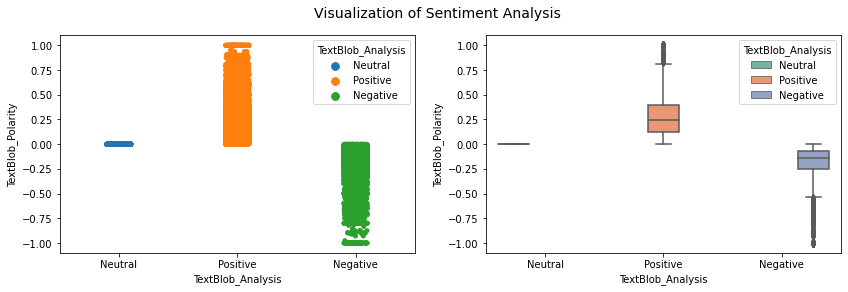

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='TextBlob_Analysis', y='TextBlob_Polarity'	, 
                   hue='TextBlob_Analysis', data=data, ax=ax1)
bp = sns.boxplot(x='TextBlob_Analysis', y="TextBlob_Polarity", 
                 hue='TextBlob_Analysis', data=data, palette="Set2", ax=ax2)
t = f.suptitle('Visualization of Sentiment Analysis', fontsize=14)

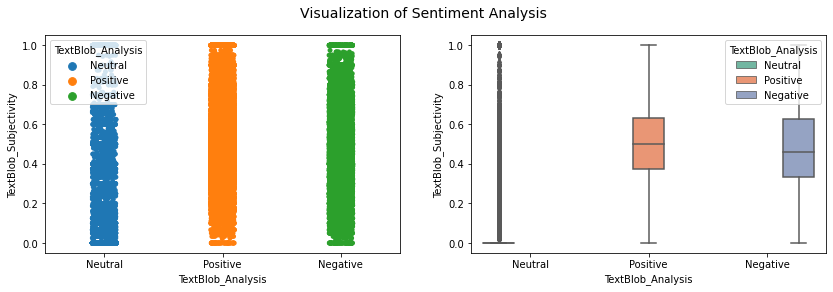

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='TextBlob_Analysis', y='TextBlob_Subjectivity'	, 
                   hue='TextBlob_Analysis', data=data, ax=ax1)
bp = sns.boxplot(x='TextBlob_Analysis', y="TextBlob_Subjectivity", 
                 hue='TextBlob_Analysis', data=data, palette="Set2", ax=ax2)
t = f.suptitle('Visualization of Sentiment Analysis', fontsize=14)

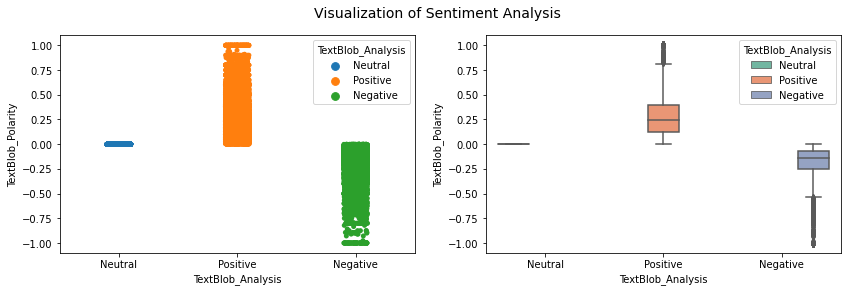

In [ ]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='TextBlob_Analysis', y="TextBlob_Polarity", 
                   hue='TextBlob_Analysis', data=data, ax=ax1)
bp = sns.boxplot(x='TextBlob_Analysis', y="TextBlob_Polarity", 
                 hue='TextBlob_Analysis', data=data, palette="Set2", ax=ax2)
t = f.suptitle('Visualization of Sentiment Analysis', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


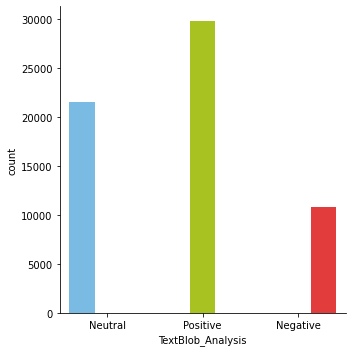

In [ ]:
fc = sns.factorplot(x="TextBlob_Analysis", hue="TextBlob_Analysis", 
                    data=data, kind="count", 
                    palette={"Negative": "#FE2020", 
                             "Positive": "#BADD07", 
                             "Neutral": "#68BFF5"})

In [ ]:
data.to_csv("Extracted_lstm.csv")

In [ ]:
import pandas as pd

In [ ]:
df1=pd.read_csv('/content/Extracted_lstm.csv')

In [ ]:
df1.head()

,Unnamed: 0,Text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,0,Def crack because were not supposed to pay out...,0.000000,0.000000,Neutral
1,1,I cant say no as there arent enough studies cu...,0.475000,0.000000,Neutral
2,2,Oh because lots of people get bad complication...,0.593333,0.190000,Positive
3,3,I cant take care of my family and my community...,0.595238,-0.232143,Negative
4,4,Bombshell Australian Government Website Author...,0.000000,0.000000,Neutral


In [ ]:
df1.drop(['Unnamed: 0','TextBlob_Subjectivity','TextBlob_Polarity'],axis=1,inplace=True)

In [ ]:
df1.head()

,Text,TextBlob_Analysis
0,Def crack because were not supposed to pay out...,Neutral
1,I cant say no as there arent enough studies cu...,Neutral
2,Oh because lots of people get bad complication...,Positive
3,I cant take care of my family and my community...,Negative
4,Bombshell Australian Government Website Author...,Neutral


In [ ]:
df1 = df1.loc[(df1['TextBlob_Analysis'] == 'Positive') | (df1['TextBlob_Analysis'] == 'Negative')|(df1['TextBlob_Analysis'] == 'Neutral')]

df1.loc[df1['TextBlob_Analysis'] == 'Positive','sentiment'] = 1 
df1.loc[df1['TextBlob_Analysis'] == 'Negative','sentiment'] = -1
df1.loc[df1['TextBlob_Analysis'] == 'Neutral','sentiment'] = 0



In [ ]:
df1.head()

,Text,TextBlob_Analysis,sentiment
0,Def crack because were not supposed to pay out...,Neutral,0.0
1,I cant say no as there arent enough studies cu...,Neutral,0.0
2,Oh because lots of people get bad complication...,Positive,1.0
3,I cant take care of my family and my community...,Negative,-1.0
4,Bombshell Australian Government Website Author...,Neutral,0.0


In [ ]:
import spacy
import re
nlp = spacy.load('en_core_web_sm')


In [ ]:
df1["Text"] = df1["Text"].astype(str)
df1["Text"] = df1['Text'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x) if not y.is_stop]))
df1['Text'] = df1['Text'].apply(lambda x: x.lower())
df1['Text'] = df1['Text'].apply((lambda x: re.sub('[^\w\s]','',x)))

In [ ]:
df1.head()

,Text,TextBlob_Analysis,sentiment
0,def crack suppose pay pocket covid testsvaccin...,Neutral,0.0
1,not not study currently risk case decide risk ...,Neutral,0.0
2,oh lot people bad complication covid pretty go...,Positive,1.0
3,not care family community care vaccine protect...,Negative,-1.0
4,bombshell australian government website author...,Neutral,0.0


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_features = 3000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df1['Text'].values)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df1['Text']

In [ ]:
y=df1['sentiment']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1)

In [ ]:
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train)

In [ ]:
X_train

array([[   0,    0,    0, ..., 1329,  251, 1510],
       [   0,    0,    0, ...,  554,   93,  210],
       [   0,    0,    0, ...,    1,   88,  373],
       ...,
       [   0,    0,    0, ...,  625,  416,    2],
       [   0,    0,    0, ...,  119,  379,   86],
       [   0,    0,    0, ...,    1,  686,  603]], dtype=int32)

In [ ]:
X_train.shape

(46642, 42)

In [ ]:
X_test = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(X_test)

In [ ]:
X_test.shape

(15548, 39)

In [ ]:
X_test

array([[   0,    0,    0, ...,    7,    2,    1],
       [   0,    0,    0, ...,    1,   60, 2150],
       [   0,    0,    0, ...,  734, 1034, 2032],
       ...,
       [   0,    0,    0, ..., 2890,  444,  632],
       [   0,    0,    0, ..., 1528,   25,  471],
       [   0,    0,    0, ...,   19,  455,  210]], dtype=int32)

In [ ]:
import numpy as np
X_test = np.lib.pad(X_test, ((0,0),(X_train.shape[1] - X_test.shape[1],0)), 'constant', constant_values=(0))
X_test.shape

(15548, 42)

In [ ]:
y_train = np.array(pd.get_dummies((y_train)))

In [ ]:
y_test = np.array(pd.get_dummies(y_test))

In [ ]:
y_train

array([[0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       ...,
       [1, 0, 0],
       [0, 0, 1],
       [1, 0, 0]], dtype=uint8)

In [ ]:
y_train.shape

(46642,)

In [ ]:
y_test.shape

(15548,)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
max_features = 3000
embed_dim = 128
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X_train.shape[1]))

In [ ]:
model.add(SpatialDropout1D(0.3))

In [ ]:
lstm_out = 256
model.add(LSTM(lstm_out, dropout=0.5, recurrent_dropout=0.5))

In [ ]:
model.add(Dense(3,activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 42, 128)           384000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 42, 128)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 256)               394240    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
Total params: 779,011
Trainable params: 779,011
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
X_train.shape

(46642,)

In [ ]:
y_train.shape

(46642, 3)

In [ ]:
X_train.shape

In [ ]:
batch_size = 32
model.fit(X_train, y_train, epochs = 10, batch_size=batch_size, verbose = 2, shuffle=False)

Epoch 1/10
1458/1458 - 453s - loss: 0.5662 - accuracy: 0.7719 - 453s/epoch - 311ms/step
Epoch 2/10
1458/1458 - 436s - loss: 0.4565 - accuracy: 0.8266 - 436s/epoch - 299ms/step
Epoch 3/10
1458/1458 - 436s - loss: 0.4287 - accuracy: 0.8361 - 436s/epoch - 299ms/step
Epoch 4/10
1458/1458 - 434s - loss: 0.4065 - accuracy: 0.8437 - 434s/epoch - 298ms/step
Epoch 5/10
1458/1458 - 433s - loss: 0.3839 - accuracy: 0.8524 - 433s/epoch - 297ms/step
Epoch 6/10
1458/1458 - 434s - loss: 0.3648 - accuracy: 0.8593 - 434s/epoch - 298ms/step
Epoch 7/10
1458/1458 - 434s - loss: 0.3461 - accuracy: 0.8663 - 434s/epoch - 298ms/step
Epoch 8/10
1458/1458 - 434s - loss: 0.3311 - accuracy: 0.8724 - 434s/epoch - 298ms/step
Epoch 9/10


In [ ]:
y_train = np.array(pd.get_dummies((X_train))
y_test = np.array(pd.get_dummies((X_test))

SyntaxError: ignored

In [ ]:
data.head(25)

,Text,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,def crack were supposed pay pocket covid tests...,0.000000,0.000000,Neutral
1,cant say arent enough study currently say risk...,0.300000,0.000000,Neutral
2,oh lot people get bad complication covid prett...,0.593333,0.190000,Positive
3,i cant take care family community unless first...,0.595238,-0.232143,Negative
4,bombshell australian government website author...,0.000000,0.000000,Neutral
5,america really said vaccine? yeah covid over,0.200000,0.200000,Positive
6,euco thousand s calling share covid vaccine co...,0.000000,0.000000,Neutral
7,moderna boosting covid19 vaccinemaking capacit...,0.000000,0.000000,Neutral
8,covid scam vaccine dont work mask myth please ...,0.454545,0.136364,Positive
9,pfizer covid shot neither confers immunity pre...,0.425000,0.150000,Positive


In [ ]:
data['TextBlob_Analysis'].value_counts()

Positive    28340
Neutral     23073
Negative    10777
Name: TextBlob_Analysis, dtype: int64

In [ ]:
2834000/62190

45.5700273355845

In [ ]:
2307300/62190

37.100820067534976

In [ ]:
1077700/62190

17.329152596880526